<a href="https://colab.research.google.com/github/sdsc-bw/DataFactory/blob/develop/finetuning/Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finetuning

To find a suitable model for your ML problem is very important. Not every model has the same performane on every task. Some models can be to simple (underfitting) and some models can be to complex for for a problem (overfitting). Also a model has different hyperparameters which also have an impact on the performance. Therefor exist libraries that can be used to find a appropriate model and its hyperparameters. Popular ones are [auto-sklearn](https://github.com/automl/auto-sklearn) and [hyperopt](https://github.com/hyperopt/hyperopt).

In [1]:
! git clone https://github.com/sdsc-bw/finetuning.git
! ls

Cloning into 'finetuning'...
remote: Repository not found.
fatal: repository 'https://github.com/sdsc-bw/finetuning.git/' not found
Der Befehl "ls" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.


## Import packages

In [2]:
root = '../'

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_wine, load_digits
from hyperopt import hp

import sys
sys.path.insert(0, root + "codes")
from DataFactory import DataFactory

In [4]:
import warnings
warnings.filterwarnings('ignore')

## Load dataset: MNIST digit dataset

In [5]:
X, y = load_digits(return_X_y=True)

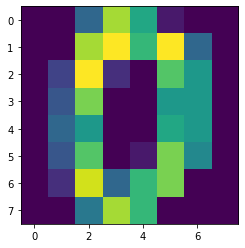

In [6]:
plt.imshow(X[0].reshape(8, 8))
plt.show()

## Load dataset: wine dataset

The third dataset is the [wine dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) from sklearn. It contains the follwing information:
- 13 features
- 3 classes

In [7]:
data = load_wine()
df_wine = pd.DataFrame(data.data, columns=data.feature_names)
df_wine['class'] = pd.Series(data.target)

In [8]:
# needs no prepocessing
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## Use DataFactory

In [9]:
datafactory = DataFactory()

### Auto-sklearn

Auto-sklearn requires a linux OS (otherwise it can be run on colab). It is an automated machine learning toolkit using sklearn models. It automatically trains different ML models with different hyperparameters. At the end it selects the best model. In the DataFactory you can use it like that:

In [10]:
#model, score = datafactory.finetune(X, y, strategy='auto_sklearn', mtype='C')

### Sklearn with Search

Sklearn also provides functions to tune the hyperparameters for a specific model. We implemented a function to also find the best model:

We can define the models that we want to test. Then we have to define a *param* variable that defines the strategy how to examine the search space. There we also can define the parameters of the search space. If parameters for models are not given, it uses the standard search space. Like we do it here:

In [11]:
# list with models to try out
models = ['decision_tree', 'random_forest', 'adaboost']

In [12]:
model, score = datafactory.finetune(X, y, strategy='sklearn', models=models, cv=5, mtype='C')

2021-11-22 13:52:31,540 - DataFactory - INFO - Start finetuning...
2021-11-22 13:52:31,541 - DataFactory - INFO - Start search for best parameters of: decision_tree...
2021-11-22 13:52:33,029 - DataFactory - INFO - ...End search
2021-11-22 13:52:33,030 - DataFactory - INFO - Best parameters are: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 9, 'criterion': 'gini'} with score 0.85
2021-11-22 13:52:33,030 - DataFactory - INFO - Start search for best parameters of: random_forest...
2021-11-22 13:52:36,246 - DataFactory - INFO - ...End search
2021-11-22 13:52:36,246 - DataFactory - INFO - Best parameters are: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10} with score 0.97
2021-11-22 13:52:36,247 - DataFactory - INFO - Start search for best parameters of: adaboost...
2021-11-22 13:52:40,742 - DataFactory - INFO - ...End search
2021-11-22 13:52:40,742 - DataFactory - INFO - Best parameters are: {'n_estimators': 200, 'learning_rate': 0.01} w

In [13]:
score

0.9711640387431736

Here we defined a custom search space:

In [14]:
# list with params for every model to try out (search strategy of hyperparameters should be in ['grid', 'random'])
params = {'strategy': 'random', 'decision_tree': {"criterion": ['gini', 'entropy'], "max_depth": range(1, 50), "min_samples_split": range(1, 20), "min_samples_leaf": range(1, 5)}, 'random_forest': {'max_depth': [1, 2, 3, 5, 10, 20, 50], 'min_samples_leaf': [1, 5, 10], 'min_samples_split': [2, 5, 10], 'n_estimators': [50, 100, 200]}, 'adaboost': {'n_estimators': [50, 100, 200], 'learning_rate':[0.001,0.01,.1]}}

In [15]:
model, score = datafactory.finetune(X, y, strategy='sklearn', models=models, cv=5, mtype='C', params=params)

2021-11-22 13:52:40,781 - DataFactory - INFO - Start finetuning...
2021-11-22 13:52:40,782 - DataFactory - INFO - Start search for best parameters of: decision_tree...
2021-11-22 13:52:40,981 - DataFactory - INFO - ...End search
2021-11-22 13:52:40,981 - DataFactory - INFO - Best parameters are: {'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': 28, 'criterion': 'entropy'} with score 0.86
2021-11-22 13:52:40,982 - DataFactory - INFO - Start search for best parameters of: random_forest...
2021-11-22 13:52:44,052 - DataFactory - INFO - ...End search
2021-11-22 13:52:44,053 - DataFactory - INFO - Best parameters are: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10} with score 0.97
2021-11-22 13:52:44,053 - DataFactory - INFO - Start search for best parameters of: adaboost...
2021-11-22 13:52:48,413 - DataFactory - INFO - ...End search
2021-11-22 13:52:48,414 - DataFactory - INFO - Best parameters are: {'n_estimators': 200, 'learning_rate': 0.

In [16]:
score

0.9711259969722548

### Hyperopt

We also can provide a function to use hyperopt. It can be used the same way

In [17]:
# list with models to try out
models = ['decision_tree']
# list with params for every model to try out (search strategy of hyperparameters should be in ['parzen', 'random'])
params = {'strategy': 'random'}

In [18]:
model, score = datafactory.finetune(X, y, strategy='hyperopt', models=models, cv=3, mtype='C', params=params.copy())

2021-11-22 13:52:48,466 - DataFactory - INFO - Start finetuning...


0 switch
1   hyperopt_param
2     Literal{classifier_type}
3     randint
4       Literal{1}
5   dict
6    criterion =
7     switch
8       hyperopt_param
9         Literal{criterion}
10         randint
11           Literal{2}
12       Literal{gini}
13       Literal{entropy}
14    cv =
15     Literal{3}
16    max_depth =
17     float
18       hyperopt_param
19         Literal{max_depth}
20         quniform
21           Literal{1}
22           Literal{10}
23           Literal{1}
24    min_samples_leaf =
25     switch
26       hyperopt_param
27         Literal{min_samples_leaf}
28         randint
29           Literal{3}
30       Literal{1}
31       Literal{2}
32       Literal{4}
33    min_samples_split =
34     switch
35       hyperopt_param
36         Literal{min_samples_split}
37         randint
38           Literal{3}
39       Literal{2}
40       Literal{3}
41       Literal{5}
42    model =
43     Literal{decision_tree}
44    type =
45     Literal{C}
100%|██████████████████████████████

2021-11-22 13:52:49,754 - DataFactory - INFO - ...End finetuning
2021-11-22 13:52:49,754 - DataFactory - INFO - Best model is: decision_tree with parameters: {'criterion': 'gini', 'max_depth': 9.0, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [19]:
score

0.7757373400111297

If we want to define custom parameters, they should be defined with the functions of hyperopt.

In [20]:
models = ['decision_tree']
params = {'strategy': 'random', 'decision_tree': {'max_depth': hp.quniform('max_depth', 1, 10, 1), 'criterion': hp.choice('criterion', ['gini', 'entropy']), 'min_samples_leaf': hp.choice('min_samples_leaf', [1, 2, 4])}, 'random_forest': {'max_depth': hp.choice('max_depth', [1, 2, 3, 5, 10, 20, 50]), 'n_estimators': hp.choice('n_estimators', [50, 100, 200])}}

In [21]:
model, score = datafactory.finetune(X, y, strategy='hyperopt', models=models, cv=5, mtype='C', params=params.copy())

2021-11-22 13:52:49,793 - DataFactory - INFO - Start finetuning...


0 switch
1   hyperopt_param
2     Literal{classifier_type}
3     randint
4       Literal{1}
5   dict
6    criterion =
7     switch
8       hyperopt_param
9         Literal{criterion}
10         randint
11           Literal{2}
12       Literal{gini}
13       Literal{entropy}
14    cv =
15     Literal{5}
16    max_depth =
17     float
18       hyperopt_param
19         Literal{max_depth}
20         quniform
21           Literal{1}
22           Literal{10}
23           Literal{1}
24    min_samples_leaf =
25     switch
26       hyperopt_param
27         Literal{min_samples_leaf}
28         randint
29           Literal{3}
30       Literal{1}
31       Literal{2}
32       Literal{4}
33    model =
34     Literal{decision_tree}
35    type =
36     Literal{C}
100%|███████████████████████████████████████████████| 32/32 [00:01<00:00, 16.11trial/s, best loss: -0.8058000619003405]

2021-11-22 13:52:51,820 - DataFactory - INFO - ...End finetuning
2021-11-22 13:52:51,821 - DataFactory - INFO - Best model is: decision_tree with parameters: {'criterion': 'entropy', 'max_depth': 9.0, 'min_samples_leaf': 1}


In [22]:
score

0.8058000619003405